#**IMPLEMENTING FIND-S algorithm**


**Implement and demonstrate the FIND-S algorithm for finding the most specific hypothesis based on a given set of
training data samples. Read the training data from a .CSV file.**


In [207]:
import pandas as pd

In [208]:
df=pd.read_csv("/content/ws.csv")
df

,Sunny,Warm,Normal,Strong,Warm.1,Same,Yes
0,Sunny,Warm,High,Strong,Warm,Same,Yes
1,Rainy,Cold,High,Strong,Warm,Change,No
2,Sunny,Warm,High,Strong,Cool,Change,Yes


In [209]:
n=len(df)# row
m=len(df.axes[1]) # column

In [210]:
hypothesis=['0']*(m-1)
for j in range(m-1):
  hypothesis[j]=df.iloc[0,j]
hypothesis


['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same']

In [211]:
for i in range(n):
  if(df.iloc[i,m-1]=='Yes'):
    for j in range(m-1):
      if(df.iloc[i,j]!=hypothesis[j]):
        hypothesis[j]='?'
      else:
        hypothesis[j]=df.iloc[i,j]
    print(hypothesis)



['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same']
['Sunny', 'Warm', 'High', 'Strong', '?', '?']


#**IMPLEMENTING CandidateElimination algorithm**

**For a given set of training data examples stored in a .CSV file, implement and demonstrate the CandidateElimination algorithm to output a description of the set of all hypotheses consistent with the training examples**

In [212]:
import pandas as pd
import numpy as np

In [213]:
data=pd.read_csv("/content/ws.csv")
data

,Sunny,Warm,Normal,Strong,Warm.1,Same,Yes
0,Sunny,Warm,High,Strong,Warm,Same,Yes
1,Rainy,Cold,High,Strong,Warm,Change,No
2,Sunny,Warm,High,Strong,Cool,Change,Yes


In [214]:
data.describe()


,Sunny,Warm,Normal,Strong,Warm.1,Same,Yes
count,3,3,3,3,3,3,3
unique,2,2,1,1,2,2,2
top,Sunny,Warm,High,Strong,Warm,Change,Yes
freq,2,2,3,3,2,2,2


In [215]:
n=len(data)# row
m=len(data.axes[1])

In [216]:
concepts = np.array(data.iloc[:,0:-1])

target = np.array(data.iloc[:,-1])

print(target)

print(concepts)

['Yes' 'No' 'Yes']
[['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
 ['Rainy' 'Cold' 'High' 'Strong' 'Warm' 'Change']
 ['Sunny' 'Warm' 'High' 'Strong' 'Cool' 'Change']]


In [217]:
def learn(concepts, target):

    specific_h = concepts[0].copy()

    print("Initialization of specific_h and general_h")

    print("specific_h: ",specific_h)

    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]

    print("general_h: ",general_h)

    print("concepts: ",concepts)

    for i, h in enumerate(concepts):

        if target[i] == "yes":

            for x in range(len(specific_h)):

                #print("h[x]",h[x])

                if h[x] != specific_h[x]:

                    specific_h[x] = '?'

                    general_h[x][x] = '?'

        if target[i] == "no":

            for x in range(len(specific_h)):

                if h[x] != specific_h[x]:

                    general_h[x][x] = specific_h[x]

                else:

                    general_h[x][x] = '?'

    print("\nSteps of Candidate Elimination Algorithm: ",i+1)

    print("Specific_h: ",i+1)

    print(specific_h,"\n")

    print("general_h :", i+1)

    print(general_h)

    indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]

    print("\nIndices",indices)

    for i in indices:

        general_h.remove(['?', '?', '?', '?', '?', '?'])

    return specific_h, general_h

s_final,g_final = learn(concepts, target)

print("\nFinal Specific_h:", s_final, sep="\n")

print("Final General_h:", g_final, sep="\n")

Initialization of specific_h and general_h
specific_h:  ['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
general_h:  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
concepts:  [['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
 ['Rainy' 'Cold' 'High' 'Strong' 'Warm' 'Change']
 ['Sunny' 'Warm' 'High' 'Strong' 'Cool' 'Change']]

Steps of Candidate Elimination Algorithm:  3
Specific_h:  3
['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same'] 

general_h : 3
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Indices [0, 1, 2, 3, 4, 5]

Final Specific_h:
['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
Final General_h:
[]


#**IMPLEMENTING Decision Tree Based ID3 Algorithm**

**Write a program to demonstrate the working of the decision tree based ID3 algorithm. Use an appropriate data set
for building the decision tree and apply this knowledge to classify a new sample.**

In [218]:
import pandas as pd
import numpy as np
eps = np.finfo(float).eps
from sklearn.model_selection import train_test_split
df = pd.read_csv("/content/play_tennis (1).csv")
df = df.drop('day',axis=1)
df

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [219]:
df.columns

Index(['outlook', 'temp', 'humidity', 'wind', 'play'], dtype='object')

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   wind      14 non-null     object
 4   play      14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [221]:
df.describe()

,outlook,temp,humidity,wind,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,Sunny,Mild,High,Weak,Yes
freq,5,6,7,8,9


**Decision tree**
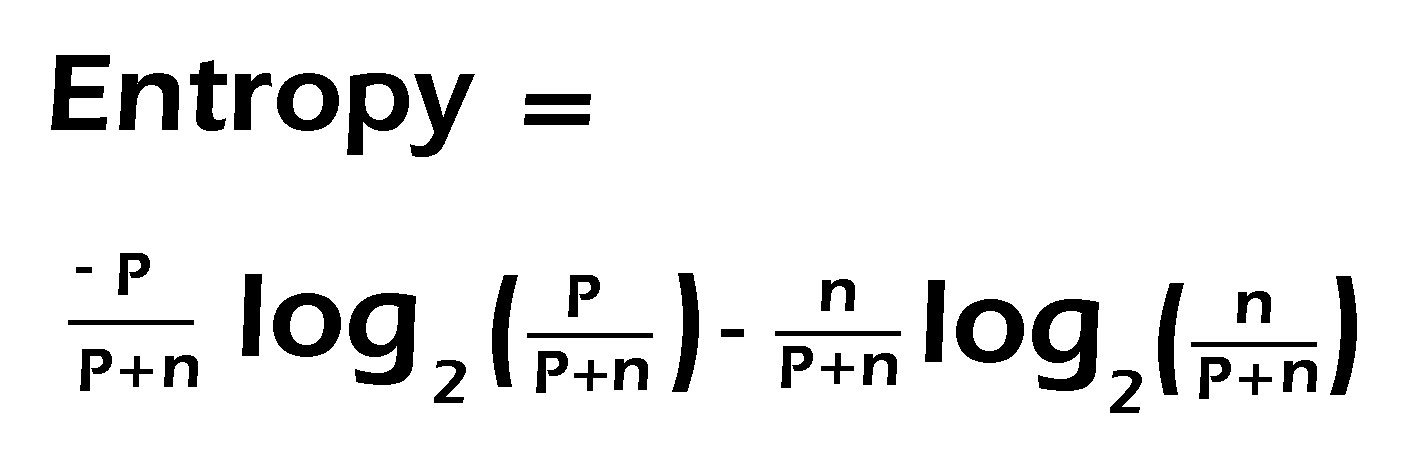


**Now implementing Entropy Function**

In [222]:
df.keys()[-1]

'play'

In [223]:
def find_entropy(df):
  target = df.keys()[-1]# finds target column
  entropy = 0
  values = df[target].unique()#give all 'yes' and 'no'
  for value in values:
    # df['Outlook'].value_counts()['Sunny'] ,it give number of count of each unique item
    take=df[target].value_counts()[value]
    frac = take/len(df[target])
    entropy += -frac*np.log2(frac)

  return entropy

In [224]:
find_entropy(df)

0.9402859586706311

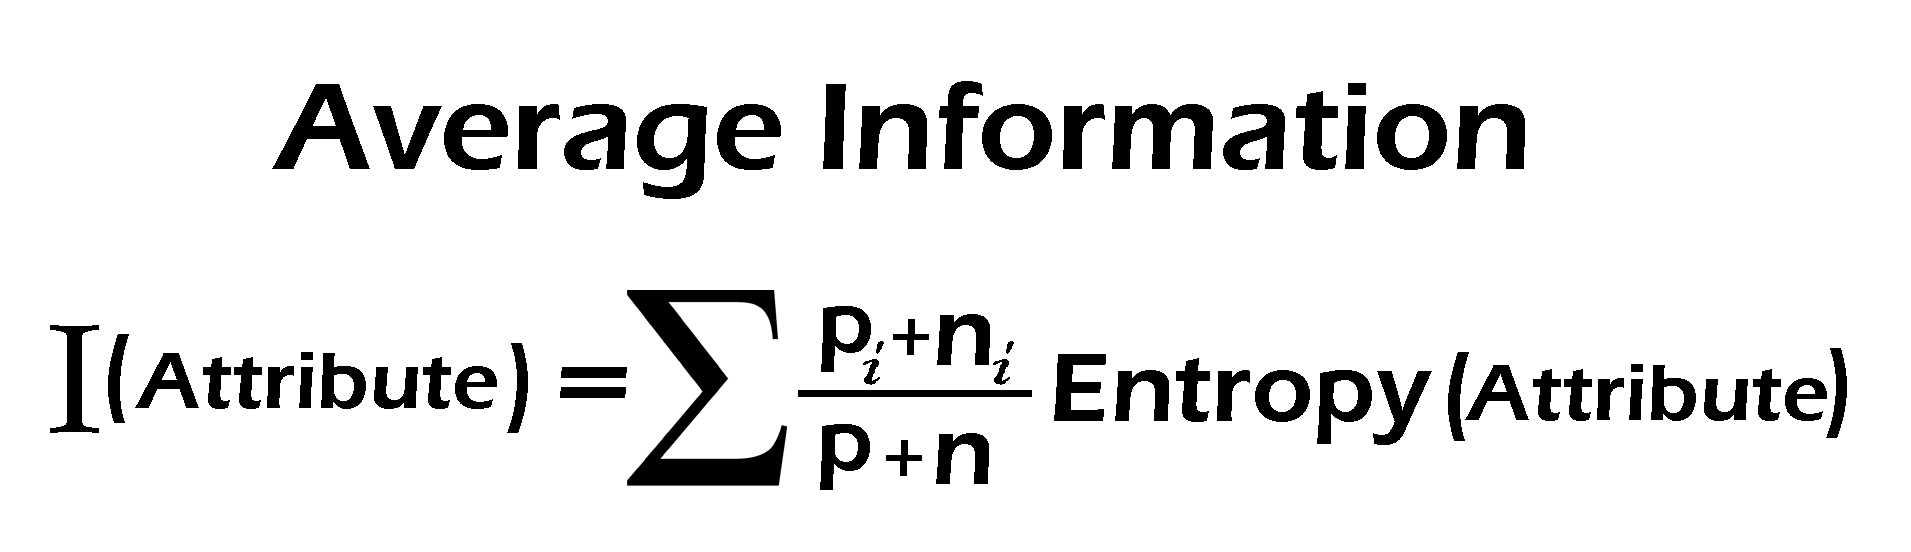

In [225]:
def average_information(df,attribute):
  target = df.keys()[-1]
  target_var = df[target].unique()
  variables = df[attribute].unique()
  entropy2 = 0
  for variable in variables:
    entropy = 0
    for tar in target_var:
      #print(df[attribute][df[attribute]==variable][df[target]==tar])
      num = len(df[attribute][df[attribute]==variable][df[target]==tar])
      en = len(df[attribute][df[attribute]==variable])
      fraction = num/(en+eps+num)
      entropy += -fraction*np.log2(fraction+eps)

    fraction2 = en/len(df)
    entropy2 += -fraction2*entropy
  return abs(entropy2)

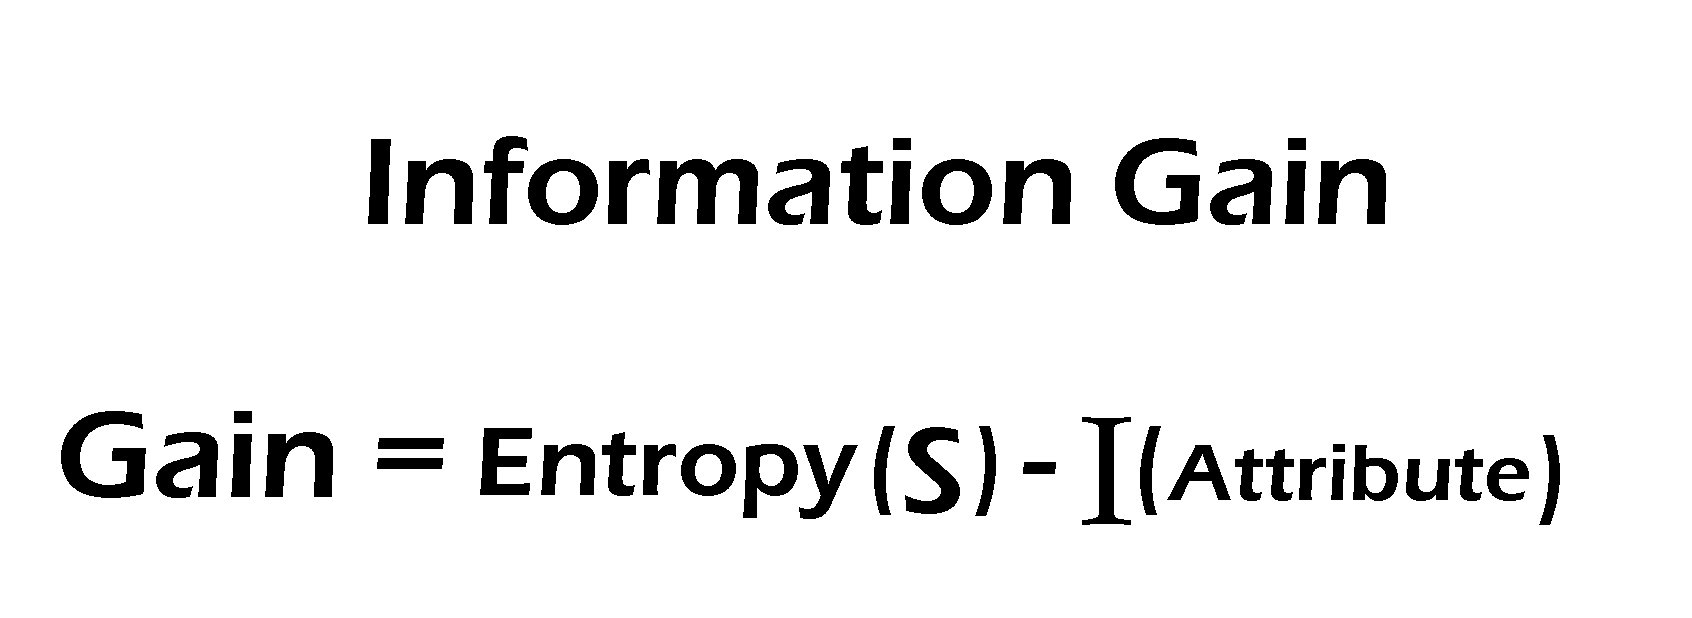

In [226]:
def find_winner(df):
    IG = []
    for key in df.keys()[:-1]:
        IG.append(find_entropy(df)-average_information(df,key))#information gain
    return df.keys()[:-1][np.argmax(IG)]

In [227]:
#-----------------------------------#
def get_subtable(df, node,value):
  return df[df[node] == value].reset_index(drop=True)

In [228]:
def buildTree(df,tree=None):
    target = df.keys()[-1] #target column

    #Here we build our decision tree

    #Get attribute with maximum information gain
    node = find_winner(df)

    #Get distinct value of that attribute e.g Salary is node and Low,Med and High are values
    attValue = np.unique(df[node])

    #Create an empty dictionary to create tree
    if tree is None:
        tree={}
        tree[node] = {}

    for value in attValue:

        subtable = get_subtable(df,node,value)
        clValue,counts = np.unique(subtable[target],return_counts=True)

        if len(counts)==1:#Checking purity of subset
            tree[node][value] = clValue[0]
        else:
            tree[node][value] = buildTree(subtable) #Calling the function recursively

    return tree

In [229]:
tree = buildTree(df)

In [230]:
tree

{'outlook': {'Overcast': 'Yes',
  'Rain': {'wind': {'Strong': 'No', 'Weak': 'Yes'}},
  'Sunny': {'humidity': {'High': 'No', 'Normal': 'Yes'}}}}

In [231]:
# this function is udes to covert if any data in integer format then we convet to string so that we can easily generate tree!
def convert_dict_to_string(data):
    if isinstance(data, dict):
        return {str(key): convert_dict_to_string(value) for key, value in data.items()}
    elif isinstance(data, list):
        return [convert_dict_to_string(item) for item in data]
    else:
        return str(data)
data = convert_dict_to_string(tree)

In [232]:
data

{'outlook': {'Overcast': 'Yes',
  'Rain': {'wind': {'Strong': 'No', 'Weak': 'Yes'}},
  'Sunny': {'humidity': {'High': 'No', 'Normal': 'Yes'}}}}

In [233]:
from graphviz import Digraph



def generate_tree(data, graph, parent_node=None):
    for key, value in data.items():
        if isinstance(value, dict):
            node_label = key
            if parent_node:
                graph.node(node_label)
                graph.edge(parent_node, node_label)
            generate_tree(value, graph, node_label)
        else:
            node_label = f"{key}: {str(value)}"
            graph.node(node_label)
            graph.edge(parent_node, node_label)

# Create a new graph
graph = Digraph()
# Generate tree
generate_tree(data, graph)
# Render the graph to an image file
graph.render('tree', format='png', cleanup=True)


'tree.png'

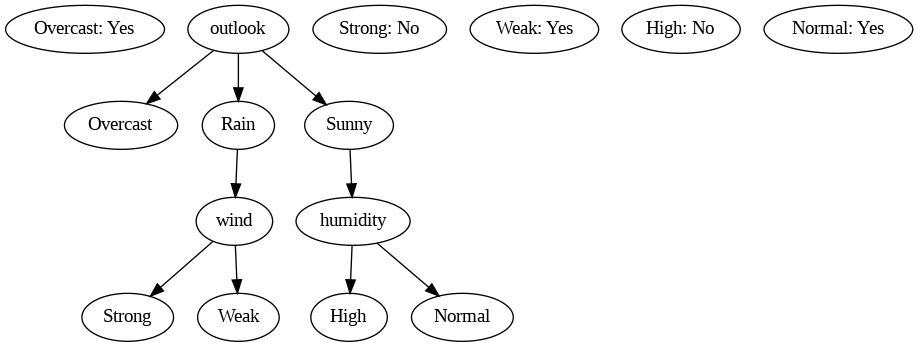

#**IMPLEMENTING Backpropagation Algorithm and Build Artificial Neural Network(ANN)**

In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [258]:
data=pd.read_csv("/content/insurance_data (1).csv")
data.sample(10)

,age,affordibility,bought_insurance
11,28,1,0
7,60,0,1
4,46,1,1
18,19,0,0
20,21,1,0
13,29,0,0
16,25,0,1
2,47,1,1
21,26,0,0
5,56,1,1


In [259]:
data.shape

(28, 3)

In [260]:
data.describe()

,age,affordibility,bought_insurance
count,28.000000,28.000000,28.000000
mean,39.892857,0.678571,0.500000
std,15.497525,0.475595,0.509175
min,18.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000
50%,45.500000,1.000000,0.500000
75%,54.250000,1.000000,1.000000
max,62.000000,1.000000,1.000000


In [261]:
x = data.drop(['bought_insurance'],axis=1)
y = data.bought_insurance

In [262]:
y[:5]

0    0
1    0
2    1
3    0
4    1
Name: bought_insurance, dtype: int64

In [263]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.33, random_state=42)

In [264]:
x_train_scaled = x_train.copy()
x_train_scaled['age'] = x_train_scaled['age'] /100
x_train_scaled

,age,affordibility
15,0.55,1
1,0.25,0
4,0.46,1
5,0.56,1
2,0.47,1
16,0.25,0
23,0.45,1
3,0.52,0
26,0.23,1
24,0.50,1


In [265]:
x_test_scaled = x_test.copy()
x_test_scaled['age'] = x_test_scaled['age'] / 100
x_test_scaled

,age,affordibility
9,0.61,1
25,0.54,1
8,0.62,1
21,0.26,0
0,0.22,1
12,0.27,0
17,0.58,1
22,0.40,1
11,0.28,1
13,0.29,0


In [266]:
x_train_scaled.shape

(18, 2)

In [267]:
class myANN:
  def __init__(self):
    self.input=2
    self.hidden=3
    self.output=1
    self.lr = 0.1

    self.w1 = np.random.randn(self.input,self.hidden)
    self.w2 = np.random.randn(self.hidden,self.output)
    self.bias1 = np.random.randn(1,self.hidden)
    self.bias2 = np.random.randn(1,self.output)

  def sigmoid(self,z, deriv=False):
    if deriv:
      return z*(1 - z)
    else:
      return 1 / (1 + np.exp(-z))

  def backpropagation(self, x, y, epochs):
    for i in range(epochs):
        self.z = np.dot(x, self.w1)
        self.z1 = self.sigmoid(self.z + self.bias1)

        self.z2 = np.dot(self.z1, self.w2)
        self.output = self.sigmoid(self.z2 + self.bias2)

        self.output_error = y - self.output
        self.output_delta = self.output_error * self.sigmoid(self.output, deriv=True)

        self.z2_error = self.output_delta.dot(self.w2.T)
        self.z2_delta = self.z2_error * self.sigmoid(self.z2, deriv=True)

        self.w2 += self.z1.T.dot(self.output_delta) * self.lr
        self.w1 += x.T.dot(self.z2_delta) * self.lr

    return self.w1, self.w2, self.bias1, self.bias2

  def fit(self,x,y,epochs):
    self.w1,self.w2,self.bias1,self.bias2 = self.backpropagation(x,y,epochs)

  def predict(self,x):
    output1 = np.dot(x,self.w1)
    output1 = output1 + self.bias1
    output2 = self.sigmoid(output1)
    output3 = np.dot(output1,self.w2)
    output3 = output3 + self.bias2
    output = self.sigmoid(output3)
    return output



In [268]:
import numpy as np

y_train = y_train.to_numpy().reshape(-1, 1)

In [269]:
model=myANN()
model.fit(x_train_scaled,y_train,epochs=600)

In [270]:
predicted = model.predict(x_test_scaled)

In [271]:
predicted # this is the predicted output of test dataset

array([[0.98372591],
       [0.98843846],
       [0.98291378],
       [0.44690186],
       [0.99760796],
       [0.43469506],
       [0.98594116],
       [0.99418672],
       [0.99678295],
       [0.41053147]])

In [272]:
y_test # This is the actual dataset

9     1
25    1
8     1
21    0
0     0
12    0
17    1
22    1
11    0
13    0
Name: bought_insurance, dtype: int64

#**IMPLEMENTING Naive Bayes Classifier**

**Write a program to implement the naive Bayesian Classifier for the sample training dataset stored  as a .csv file . Compute the accuracy of of the classifier, considering few test data sets.**

In [273]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random
import math

In [274]:
data = pd.read_csv("/content/play_tennis (1).csv")
data = data.drop(["day"],axis=1)
data.head()

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [275]:
data1 = pd.get_dummies(data[["outlook","temp","humidity","wind"]],dtype="int")
data1.insert(loc=len(data1.columns), column="play", value=data["play"])
data1.head()

,outlook_Overcast,outlook_Rain,outlook_Sunny,temp_Cool,temp_Hot,temp_Mild,humidity_High,humidity_Normal,wind_Strong,wind_Weak,play
0,0,0,1,0,1,0,1,0,0,1,No
1,0,0,1,0,1,0,1,0,1,0,No
2,1,0,0,0,1,0,1,0,0,1,Yes
3,0,1,0,0,0,1,1,0,0,1,Yes
4,0,1,0,1,0,0,0,1,0,1,Yes


In [276]:
class Naive_Bayes():
  def __init__(self):
    pass
  def encode_class(self,mydata):
    classes = []
    for i in range(len(mydata)):
        if mydata[i][-1] not in classes:
            classes.append(mydata[i][-1])
    for i in range(len(classes)):
        for j in range(len(mydata)):
            if mydata[j][-1] == classes[i]:
                mydata[j][-1] = i
    for i in range(len(my_data)):
       for j in range(len(my_data[i]) - 1):
        my_data[i][j] = float(my_data[i][j])
    return mydata
  def splitting(self,mydata, ratio):
    train_num = int(len(mydata) * ratio)
    train = []
    test = list(mydata)
    while len(train) < train_num:
      index = random.randrange(len(test))
      train.append(test.pop(index))
    return train, test
  def groupUnderClass(self,mydata):
    data_dict = {}
    for i in range(len(mydata)):
      if mydata[i][-1] not in data_dict:
        data_dict[mydata[i][-1]] = []
      data_dict[mydata[i][-1]].append(mydata[i])
    return data_dict
  def MeanAndStdDev(self,numbers):
    avg = np.mean(numbers)
    stddev = np.std(numbers)
    return avg, stddev

  def MeanAndStdDevForClass(self,mydata):
    info = {}
    data_dict = self.groupUnderClass(mydata)
    for classValue, instances in data_dict.items():
      info[classValue] = [self.MeanAndStdDev(attribute) for attribute in zip(*instances)]
    return info
  def calculateGaussianProbability(self,x, mean, stdev):
    epsilon = 1e-10
    expo = np.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev + epsilon, 2))))
    return (1 / (np.sqrt(2 * np.pi) * (stdev + epsilon))) * expo

  def calculateClassProbabilities(self,info, test):
    probabilities = {}
    for classValue, classSummaries in info.items():
      probabilities[classValue] = 1
      for i in range(len(classSummaries)):
        mean, std_dev = classSummaries[i]
        x = test[i]
        probabilities[classValue] *= self.calculateGaussianProbability(x, mean, std_dev)
    return probabilities


  def predict(self,info, test):
    probabilities = self.calculateClassProbabilities(info, test)
    bestLabel = max(probabilities, key=probabilities.get)
    return bestLabel

  def getPredictions(self,info, test):
    predictions = [self.predict(info, instance) for instance in test]
    return predictions
  def accuracy_rate(self,test, predictions):
    correct = sum(1 for i in range(len(test)) if test[i][-1] == predictions[i])
    return (correct / float(len(test))) * 100.0
  def splitting(self,mydata, ratio):
    train_num = int(len(mydata) * ratio)
    train = []
    test = list(mydata)
    while len(train) < train_num:
        index = random.randrange(len(test))
        train.append(test.pop(index))
    return train, test



In [277]:
def encode_class(mydata):
	classes = []
	for i in range(len(mydata)):
		if mydata[i][-1] not in classes:
			classes.append(mydata[i][-1])
	for i in range(len(classes)):
		for j in range(len(mydata)):
			if mydata[j][-1] == classes[i]:
				mydata[j][-1] = i
	return mydata


In [278]:
model = Naive_Bayes()
my_data = model.encode_class(data1.values.tolist())
my_data

[[0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0],
 [1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1],
 [0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1],
 [0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1],
 [0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0],
 [1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1],
 [0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0],
 [0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1],
 [0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1],
 [0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1],
 [1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1],
 [1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1],
 [0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0]]

In [279]:
train_data, test_data = model.splitting(my_data, 0.7)
print('Total number of examples:', len(my_data))
print('Training examples:', len(train_data))
print('Test examples:', len(test_data))

Total number of examples: 14
Training examples: 9
Test examples: 5


In [280]:
info = model.MeanAndStdDevForClass(train_data)
predictions = model.getPredictions(info, test_data)
accuracy = model.accuracy_rate(test_data, predictions)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 80.0


#**IMPLEMENTING Inbuilt Naive Bayes Model**

**Assuming a set of documents that need to be classified, use the naïve Bayesian Classifier model to perform this
task. Built-in Java classes/API can be used to write the program. Calculate the accuracy, precision, and recall for**

In [281]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,classification_report
import seaborn as sn

In [282]:
data = pd.read_csv("/content/document.csv")
data.sample(10)

,I love this sandwich,pos
7,He is my sworn enemy,neg
3,What an awesome view,pos
0,This is an amazing place,pos
12,I am sick and tired of this place,neg
2,This is my best work,pos
6,I can't deal with this,neg
1,I feel very good about these beers,pos
8,My boss is horrible,neg
10,I do not like the taste of this juice,neg
9,This is an awesome place,pos


In [283]:
df = pd.get_dummies(data["pos"],dtype='int')
df.sample(10)

,neg,pos
13,0,1
0,0,1
8,1,0
3,0,1
14,1,0
12,1,0
4,1,0
16,1,0
2,0,1
1,0,1


In [284]:
result = [data,df]
new_data = pd.concat(result,axis=1)
new_data.head()
new_data.drop("pos",axis="columns")

,I love this sandwich,neg
0,This is an amazing place,0
1,I feel very good about these beers,0
2,This is my best work,0
3,What an awesome view,0
4,I do not like this restaurant,1
5,I am tired of this stuff,1
6,I can't deal with this,1
7,He is my sworn enemy,1
8,My boss is horrible,1
9,This is an awesome place,0


In [285]:
x = new_data["I love this sandwich"]
y = new_data["neg"]

In [286]:
# splitting dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=5)

In [287]:
from sklearn.feature_extraction.text import CountVectorizer
c_count =  CountVectorizer()
x_traincv = c_count.fit_transform(x_train)
x_testcv = c_count.transform(x_test)

In [288]:
x_traincv[:5]

<5x42 sparse matrix of type '<class 'numpy.int64'>'
	with 27 stored elements in Compressed Sparse Row format>

In [289]:
cv_data = pd.DataFrame(x_traincv.toarray(),columns=c_count.get_feature_names_out())
cv_data.sample(10)

,am,amazing,an,and,awesome,bad,boss,can,deal,do,...,tired,to,today,tomorrow,view,we,went,what,will,with
11,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0


In [290]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_traincv, y_train)
pred = clf.predict(x_testcv)

In [291]:
print('Accuracy Metrics: \n')
print('Accuracy: ', accuracy_score(y_test, pred))
print('Recall: ', recall_score(y_test, pred))
print('Precision: ', precision_score(y_test, pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))

Accuracy Metrics: 

Accuracy:  0.6
Recall:  1.0
Precision:  0.5
Confusion Matrix: 
 [[1 2]
 [0 2]]


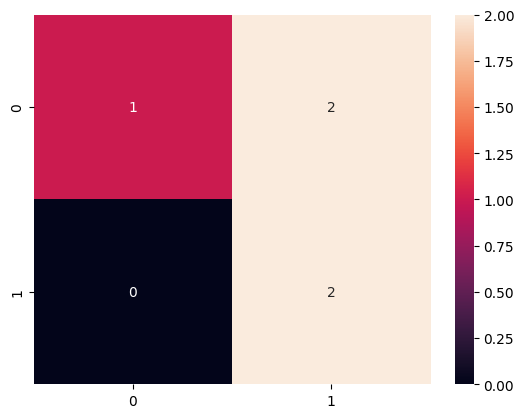

In [292]:
plt.xlabel('Predicted')
plt.ylabel('Truth')
cn = tf.math.confusion_matrix(labels=y_test,predictions=pred)
sn.heatmap(cn,annot=True,fmt='d')
plt.show()

#**IMPLEMENT Baysian Network Using Medical Data**

**Write a program to construct a Bayesian network considering medical data. Use this model to demonstrate the
diagnosis of heart patients using standard Heart Disease Data Set. You can use Java/Python ML library classes/API.**

In [293]:
import pandas as pd
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination

In [294]:
data = pd.read_csv("ds4.csv")
heart_disease = pd.DataFrame(data)
print(heart_disease)

    age  Gender  Family  diet  Lifestyle  cholestrol  heartdisease
0     0       0       1     1          3           0             1
1     0       1       1     1          3           0             1
2     1       0       0     0          2           1             1
3     4       0       1     1          3           2             0
4     3       1       1     0          0           2             0
5     2       0       1     1          1           0             1
6     4       0       1     0          2           0             1
7     0       0       1     1          3           0             1
8     3       1       1     0          0           2             0
9     1       1       0     0          0           2             1
10    4       1       0     1          2           0             1
11    4       0       1     1          3           2             0
12    2       1       0     0          0           0             0
13    2       0       1     1          1           0          

In [295]:
model = BayesianModel([
    ('age', 'Lifestyle'),
    ('Gender', 'Lifestyle'),
    ('Family', 'heartdisease'),
    ('diet', 'cholestrol'),
    ('Lifestyle', 'diet'),
    ('cholestrol', 'heartdisease'),
    ('diet', 'cholestrol')
])
model.fit(heart_disease, estimator=MaximumLikelihoodEstimator)
HeartDisease_infer = VariableElimination(model)

In [296]:
print('For Age enter SuperSeniorCitizen:0, SeniorCitizen:1, MiddleAged:2, Youth:3, Teen:4')
print('For Gender enter Male:0, Female:1')
print('For Family History enter Yes:1, No:0')
print('For Diet enter High:0, Medium:1')
print('for LifeStyle enter Athlete:0, Active:1, Moderate:2, Sedentary:3')
print('for Cholesterol enter High:0, BorderLine:1, Normal:2')

For Age enter SuperSeniorCitizen:0, SeniorCitizen:1, MiddleAged:2, Youth:3, Teen:4
For Gender enter Male:0, Female:1
For Family History enter Yes:1, No:0
For Diet enter High:0, Medium:1
for LifeStyle enter Athlete:0, Active:1, Moderate:2, Sedentary:3
for Cholesterol enter High:0, BorderLine:1, Normal:2


In [297]:
q = HeartDisease_infer.query(variables=['heartdisease'], evidence={
    'age': int(input('Enter Age: ')),
    'Gender': int(input('Enter Gender: ')),
    'Family': int(input('Enter Family History: ')),
    'diet': int(input('Enter Diet: ')),
    'Lifestyle': int(input('Enter Lifestyle: ')),
    'cholestrol': int(input('Enter Cholestrol: '))
})

print(q)


Enter Age: 3
Enter Gender: 1
Enter Family History: 1
Enter Diet: 1
Enter Lifestyle: 0
Enter Cholestrol: 1


+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              1.0000 |
+-----------------+---------------------+
| heartdisease(1) |              0.0000 |
+-----------------+---------------------+


#**IMPLEMENT EM-Algorithm and K-mean Algorithm to compare accuracy**

**Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data set for clustering using kMeans algorithm. Compare the results of these two algorithms and comment on the quality of clustering. You can
add Java/Python ML library classes/API in the program.**

In [298]:
import csv
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as sm
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches

In [299]:

class_dict = {'setosa': 0, 'versicolor': 1, 'virginica': 2}

with open('ds5.csv') as csvFile:
    dataset = [line for line in csv.reader(csvFile)]
    dataset = dataset[1:]
    X = []
    y = []
    for line in dataset:
        X.append(line[:-1])
        y.append(class_dict[line[-1]])

    X = np.array(X).astype(float)
    y = np.array(y).astype(int)

In [300]:
patch_setosa = mpatches.Patch(facecolor='yellow', label='Setosa')
patch_versicolor = mpatches.Patch(facecolor='purple', label='Versicolour')
patch_virginica = mpatches.Patch(facecolor='green', label='Virginica')

In [301]:
def rename_clusters(s):
    cnt = Counter((c1, c2) for c1, c2 in zip(s, y))
    most_common = cnt.most_common()
    map_dict = {}
    for tup in most_common:
        if not tup[0][0] in map_dict:
            map_dict[tup[0][0]] = tup[0][1]

    for i in range(len(s)):
        s[i] = map_dict[s[i]]
    return s

Accuracy EM :  0.9666666666666667


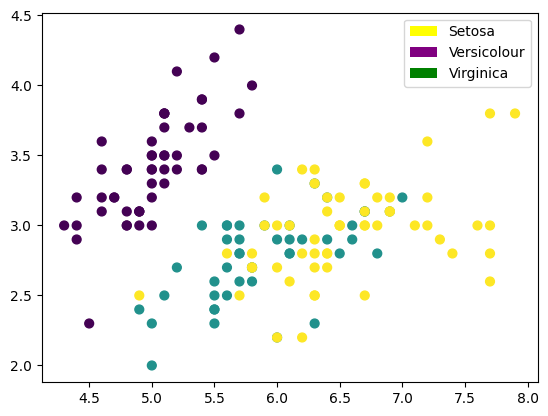

In [302]:
# EM part
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
y_kmeans = gmm.predict(X)
em = rename_clusters(y_kmeans)
plt.scatter(X[:, 0], X[:, 1], c=em, s=40, cmap='viridis')
print("Accuracy EM : ", sm.accuracy_score(y, em))
plt.legend(handles=[patch_setosa, patch_versicolor, patch_virginica])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy KM :  0.8933333333333333


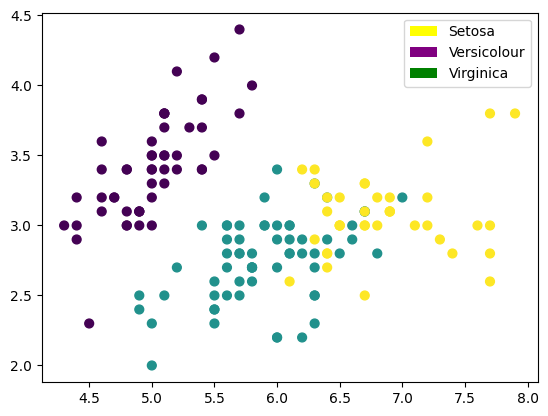

In [303]:
# K-means part
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
km = rename_clusters(y_kmeans)
plt.scatter(X[:, 0], X[:, 1], c=km, s=40, cmap='viridis')
plt.legend(handles=[patch_setosa, patch_versicolor, patch_virginica])
print("Accuracy KM : ", sm.accuracy_score(y, km))

plt.show()

#**IMPLEMENT k-Nearest Neighbour algorithm**

**Write a program to implement k-Nearest Neighbour algorithm to classify the iris data set. Print both correct and
wrong predictions. Java/Python ML library classes can be used for this problem.**

In [304]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report

In [305]:
iris = load_iris()

In [306]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [307]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [308]:
data = pd.DataFrame(iris.data,columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [309]:
data.shape

(150, 4)

In [310]:
data["target"] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [311]:
data[data.target == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [312]:
data['digit_name'] = data.target.apply(lambda x: iris.target_names[x])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,digit_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [313]:
df0 = data[:50]
df1 = data[50:100]
df2 = data[100:]

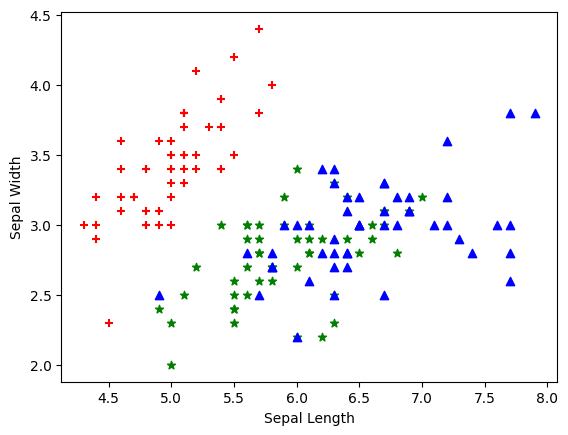

In [314]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='red',marker='+')#setosa
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='green',marker='*')#versicolor
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='blue',marker='^')#virginica

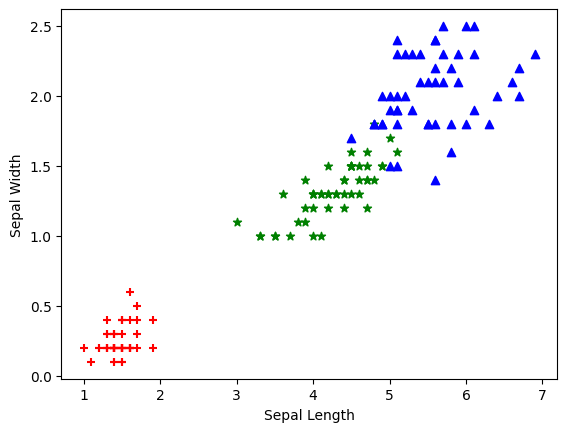

In [315]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='red',marker='+')#setosa
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green',marker='*')#versicolor
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='blue',marker='^')#virginica

In [316]:
xd = data.drop(['target','digit_name'],axis='columns')
yd = data.target

In [317]:
x_train,x_test,y_train,y_test = train_test_split(xd,yd,test_size=0.2,random_state=10)
print("Length of X_train:",len(x_train))
print("Length of x_test:",len(x_test))

Length of X_train: 120
Length of x_test: 30


In [318]:
from sklearn.neighbors import KNeighborsClassifier
# neighbor = KNeighborsClassifier(n_neighbors=10)
# neighbor.fit(x_train,y_train)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [319]:
print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))

0.9666666666666667
1.0


In [320]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]


Text(58.222222222222214, 0.5, 'Truth')

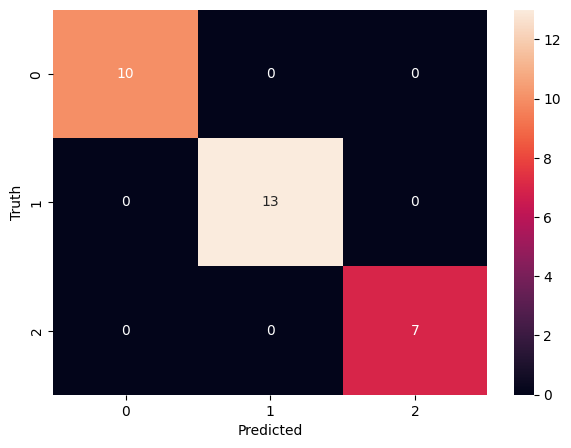

In [321]:
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [322]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#**IMPLEMENT non-parametric Locally Weighted Regression algorithm**

**Implement the non-parametric Locally Weighted Regression algorithm in order to fit data points. Select
appropriate data set for your experiment and draw graphs.**

In [323]:
import numpy as np
import matplotlib.pyplot as plt

In [324]:
# Bokeh version is in alternatives folder
def radial_kernel(x0, X, tau):
    return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau * tau))  # Weight or Radial Kernel Bias Function

In [325]:
def local_regression(x0, X, Y, tau):
    # add bias term
    x0 = np.r_[1, x0]  # Add one to avoid the loss in information
    X = np.c_[np.ones(len(X)), X]

    # fit model: normal equations with kernel
    xw = X.T * radial_kernel(x0, X, tau)  # XTranspose * W

    beta = np.linalg.pinv(xw @ X) @ xw @ Y  # @ Matrix Multiplication or Dot Product

    # predict value
    return x0 @ beta  # @ Matrix Multiplication or Dot Product for prediction


In [326]:
n = 1000
# Generate dataset
X = np.linspace(-3, 3, num=n)
print("The Data Set ( 10 Samples) X:\n", X[1:10])
Y = np.log(np.abs(X ** 2 - 1) + .5)
print("The Fitting Curve Data Set (10 Samples) Y:\n", Y[1:10])
# Jitter X
X += np.random.normal(scale=.1, size=n)
print("Jitter (10 Samples) X :\n", X[1:10])

domain = np.linspace(-3, 3, num=300)
print(" Xo Domain Space(10 Samples):\n", domain[1:10])

The Data Set ( 10 Samples) X:
 [-2.99399399 -2.98798799 -2.98198198 -2.97597598 -2.96996997 -2.96396396
 -2.95795796 -2.95195195 -2.94594595]
The Fitting Curve Data Set (10 Samples) Y:
 [2.13582188 2.13156806 2.12730467 2.12303166 2.11874898 2.11445659
 2.11015444 2.10584249 2.10152068]
Jitter (10 Samples) X :
 [-3.06082767 -2.96334775 -3.03366637 -3.03154301 -2.87651417 -3.06946606
 -3.02081586 -2.91032674 -3.00242675]
 Xo Domain Space(10 Samples):
 [-2.97993311 -2.95986622 -2.93979933 -2.91973244 -2.89966555 -2.87959866
 -2.85953177 -2.83946488 -2.81939799]


In [327]:
def plot_lwr(tau):
    # Prediction through regression
    predictions = [local_regression(x0, X, Y, tau) for x0 in domain]
    plt.scatter(X, Y, color='blue', alpha=0.3, s=20)
    plt.plot(domain, predictions, color='red', linewidth=3)
    plt.show()

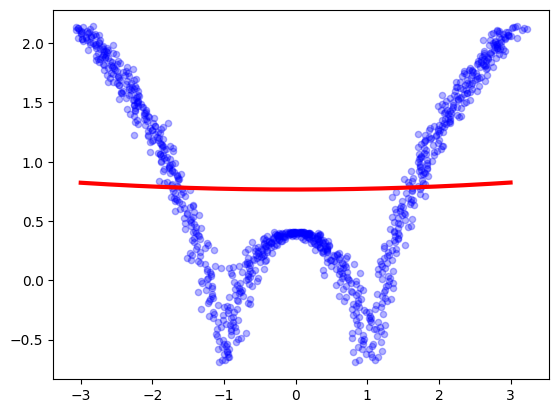

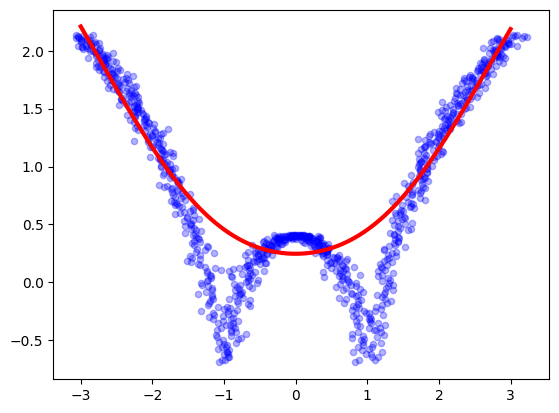

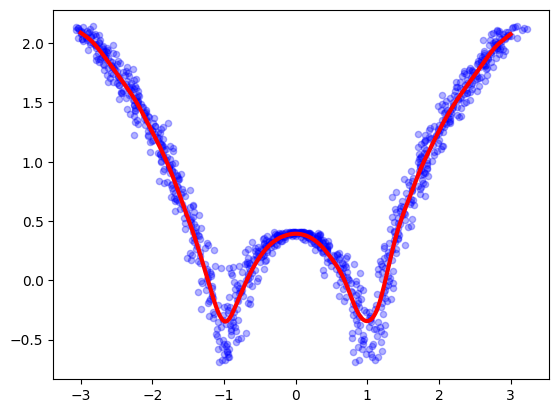

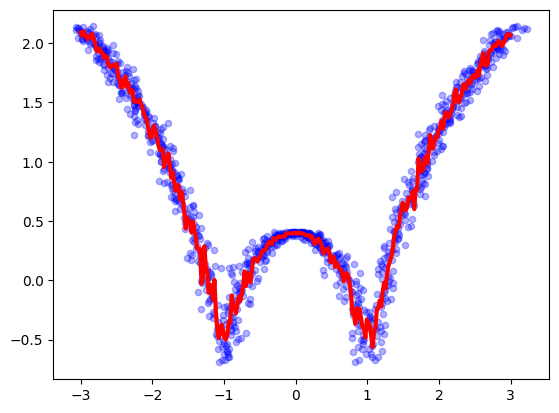

In [328]:
# Plotting the curves with different tau
plot_lwr(10.)
plot_lwr(1.)
plot_lwr(0.1)
plot_lwr(0.01)